5. Write a function `my_lin_regression(f, x, y)` where `f` is a list containing function objects to basis functions, and `x` and `y` are arrays containing noisy data. Assume that `x` and `y` are the same size. Let an estimation function for the data contained in `x` and `y` be defined as $\hat{y}(x) = \beta(1) \cdot f_{1}(x) + \beta(2) \cdot f_{2}(x) + \cdots + \beta(n) \cdot f_{n}(x)$, where `n` is the length of `f`. Your function should compute $\beta$ according to the least squares regression formula.

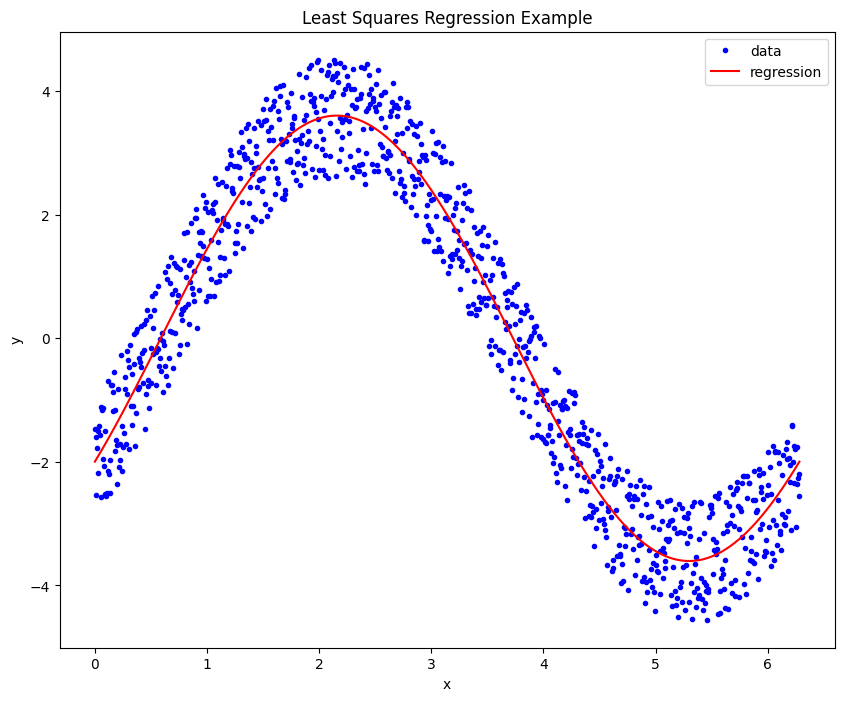

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def my_lin_regression(f, x, y):
    X = np.column_stack([func(x) for func in f])
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta

x = np.linspace(0, 2*np.pi, 1000)
y = 3*np.sin(x) - 2*np.cos(x) + np.random.uniform(-1, 1, len(x))
f = [np.sin, np.cos]
beta = my_lin_regression(f, x, y)

compute = lambda f, x, beta: sum([beta[i]*f[i](x) for i in range(len(f))]) 

plt.figure(figsize = (10,8))
plt.plot(x, y, "b.", label = "data")
plt.plot(x, compute(f, x, beta), "r", label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Least Squares Regression Example")
plt.legend()
plt.show()

6. Write a function `my_exp_regression(x,y)` where `x` and `y` are arrays of the same size. Let an estimation function for the data contained in `x` and `y` be defined as $\hat{y}(x) = \alpha e^{\beta x}$. Your function should compute $\alpha$ and $\beta$ to solve the least squares regression formula.

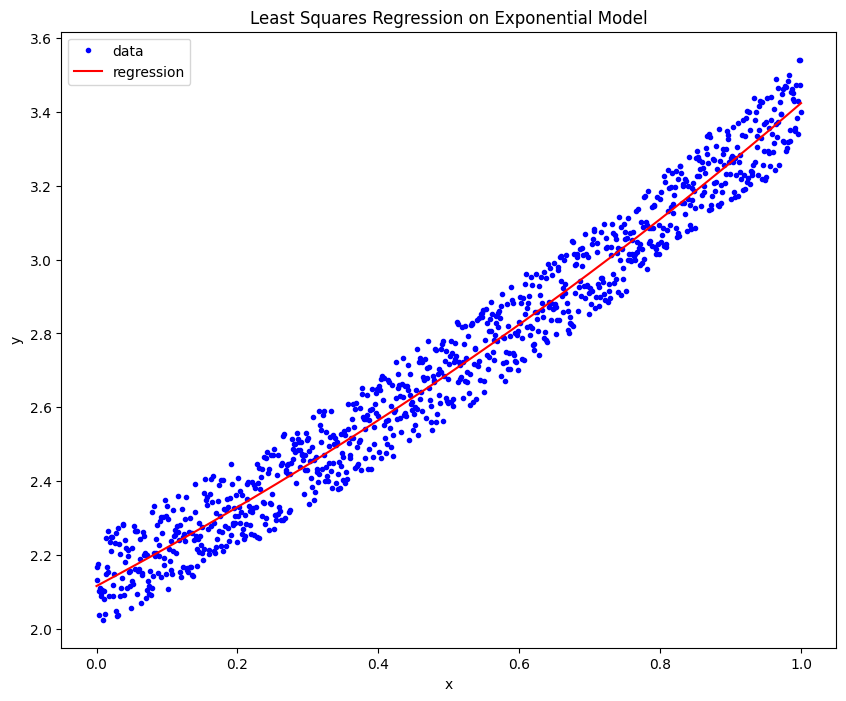

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def my_exp_regression(x, y):
    y_prime = np.log(y)
    
    X = np.column_stack([np.ones_like(x), x])
    
    beta_est = np.linalg.inv(X.T @ X) @ X.T @ y_prime
    
    alpha = np.exp(beta_est[0])
    beta = beta_est[1]

    return alpha, beta

x = np.linspace(0, 1, 1000)
y = 2*np.exp(0.5*x) + 0.25*np.random.random(len(x))

alpha, beta = my_exp_regression(x, y)

plt.figure(figsize = (10,8))
plt.plot(x, y, "b.", label = "data")
plt.plot(x, alpha*np.exp(beta*x), "r", label="regression")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Least Squares Regression on Exponential Model")
plt.legend()
plt.show()